In [1]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from numpy import mean
plots.style.use('fivethirtyeight')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__

'0.5.19'

In [2]:
raw_fte = Table.read_table("./data/deptFTE.csv")

In [3]:
raw_fte

Div,Dept,FTE
Clg of Chemistry,Chem & Biomolecular Eng,16.5
Clg of Chemistry,Chemistry,42
Clg of Chemistry,Other Chemistry Programs,0
Clg of Engineering,App Sci & Tech Grad Grp,0
Clg of Engineering,Bioengineering,19.5
Clg of Engineering,Civil & Environmental Eng,40.5
Clg of Engineering,Electrical Eng & Comp Sci,90.5
Clg of Engineering,Engineering Science,0
Clg of Engineering,Industrial Eng & Ops Rsch,14
Clg of Engineering,Materials Science & Eng,13


In [4]:
fte = raw_fte.where(raw_fte['FTE'] > 0)
fte

Div,Dept,FTE
Clg of Chemistry,Chem & Biomolecular Eng,16.5
Clg of Chemistry,Chemistry,42
Clg of Engineering,Bioengineering,19.5
Clg of Engineering,Civil & Environmental Eng,40.5
Clg of Engineering,Electrical Eng & Comp Sci,90.5
Clg of Engineering,Industrial Eng & Ops Rsch,14
Clg of Engineering,Materials Science & Eng,13
Clg of Engineering,Mechanical Engineering,41
Clg of Engineering,Nuclear Engineering,8
Clg of Env Design,Architecture,29.75


In [5]:
fte.stats()

statistic,Div,Dept,FTE
min,Clg of Chemistry,African American Studies,1
max,School of Social Welfare,UGIS-UG Interdisc Studies,90.5
median,,,15
sum,,,1510.25


In [6]:
fte.num_rows

67

In [7]:
fte['FTE']

array([ 16.5 ,  42.  ,  19.5 ,  40.5 ,  90.5 ,  14.  ,  13.  ,  41.  ,
         8.  ,  29.75,  12.75,  10.  ,  18.85,   4.5 ,  49.17,  10.33,
        27.  ,  18.5 ,  28.25,   9.  ,  82.  ,  12.  ,   6.  ,  12.75,
         9.75,  13.5 ,  55.25,   6.  ,  12.  ,  10.25,  15.5 ,   5.  ,
        16.  ,  10.25,  17.  ,  11.75,   6.75,   4.5 ,   8.5 ,  10.75,
         9.5 ,  32.25,  72.7 ,   1.  ,  13.  ,  17.  ,  49.75,  49.25,
        19.25,  12.75,  27.  ,   1.5 ,  35.75,  15.75,   7.5 ,  13.75,
        47.  ,  14.5 ,  36.95,  32.  ,  25.  ,   3.  ,   6.5 ,  61.25,
        15.  ,  46.75,  16.  ])

In [8]:
sum(fte['FTE'])

1510.2500000000002

In [9]:
ave_fte = sum(fte['FTE'])/fte.num_rows
ave_fte

22.541044776119406

In [10]:
fte.select(['Dept', 'FTE'])

Dept,FTE
Chem & Biomolecular Eng,16.5
Chemistry,42
Bioengineering,19.5
Civil & Environmental Eng,40.5
Electrical Eng & Comp Sci,90.5
Industrial Eng & Ops Rsch,14
Materials Science & Eng,13
Mechanical Engineering,41
Nuclear Engineering,8
Architecture,29.75


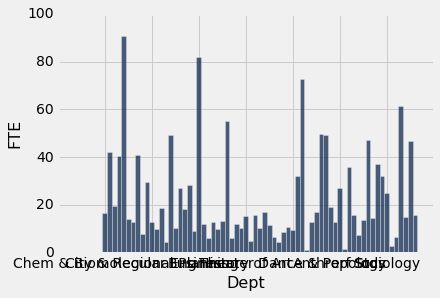

In [11]:
fte.select(['Dept', 'FTE']).bar('Dept')

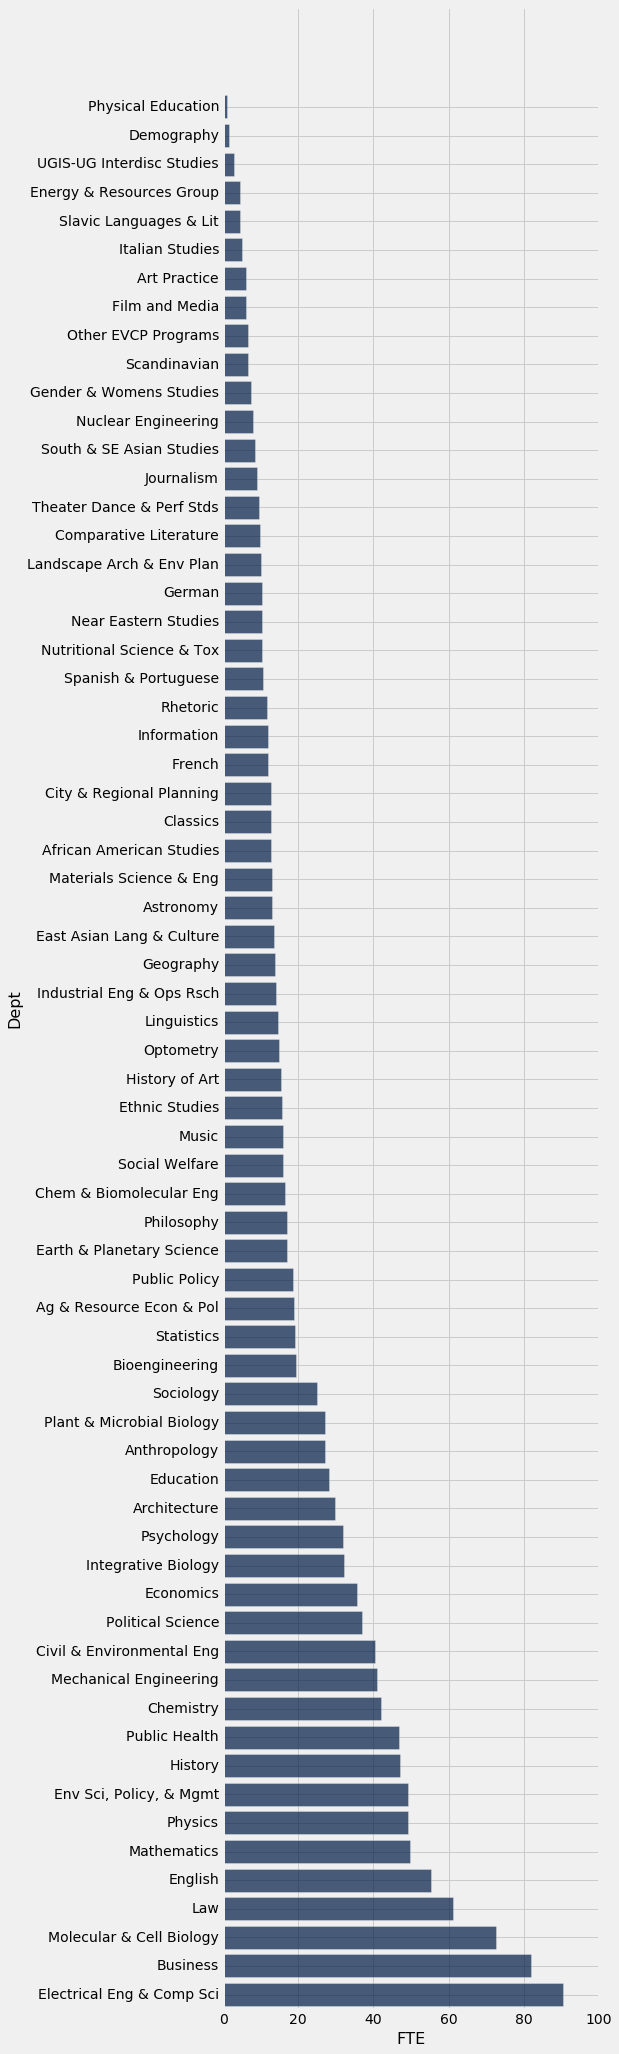

In [12]:
fte.select(['Dept', 'FTE']).sort('FTE').barh('Dept')

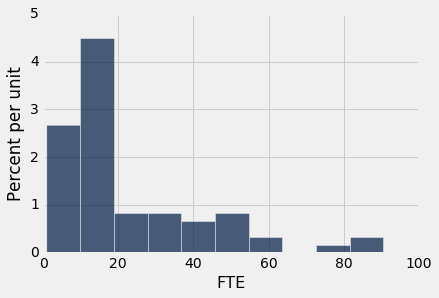

In [13]:
fte.hist('FTE')

In [14]:
fte.sample(5)

Div,Dept,FTE
Grad School of Education,Education,28.25
Clg of Env Design,Architecture,29.75
L&S-Social Sciences Div,Demography,1.5
Clg of Natural Resources,Plant & Microbial Biology,27
L&S-Arts & Humanities Div,Spanish & Portuguese,10.75


In [15]:
mean(fte.sample(5)['FTE'])

7.3499999999999996

In [16]:
def ave_sample(tbl, col, size):
    return mean(tbl.sample(size)[col])

In [17]:
ave_sample(fte, 'FTE', 5)

23.149999999999999

In [18]:
def distr(tbl, col, size, samples):
    return Table().with_column("ave " + col, [ave_sample(tbl, col, size) for sample in range(samples)])

In [19]:
distr(fte, 'FTE', 5, 100)

ave FTE
31.4
33.55
15.15
22.45
32.184
21.05
17.784
27.64
11.85
13.4


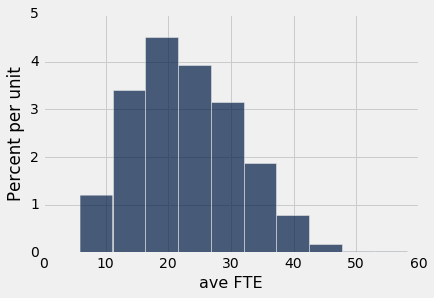

In [20]:
fte_distr = distr(fte, 'FTE', 5, 1000)
fte_distr.hist()

In [21]:
fte_distr.stats(ops=[min, mean, max])

statistic,ave FTE
min,5.9
mean,22.8785
max,58.14


In [22]:
ave_fte

22.541044776119406

In [23]:
def show_ave_fte_dist(samples):
    ave_fte_distr = distr(fte, 'FTE', 5, samples)
    ave_fte_distr.hist()
    #print(mean(ave_fte_distr['ave FTE']))


<function __main__.show_ave_fte_dist>

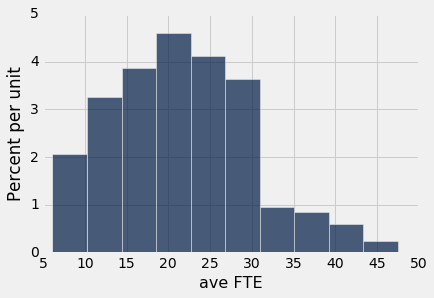

In [24]:
interact(show_ave_fte_dist, samples=(10,400,10))

In [25]:
def categorize_dept(fte):
    if fte < 15:
        return 'Small'
    elif fte > 45:
        return 'Big'
    else:
        return 'Medium'

In [26]:
fte['Size'] = fte.apply(categorize_dept, 'FTE')
fte

Div,Dept,FTE,Size
Clg of Chemistry,Chem & Biomolecular Eng,16.5,Medium
Clg of Chemistry,Chemistry,42,Medium
Clg of Engineering,Bioengineering,19.5,Medium
Clg of Engineering,Civil & Environmental Eng,40.5,Medium
Clg of Engineering,Electrical Eng & Comp Sci,90.5,Big
Clg of Engineering,Industrial Eng & Ops Rsch,14,Small
Clg of Engineering,Materials Science & Eng,13,Small
Clg of Engineering,Mechanical Engineering,41,Medium
Clg of Engineering,Nuclear Engineering,8,Small
Clg of Env Design,Architecture,29.75,Medium


In [27]:
fte.where('Size', 'Small').sample(2)

Div,Dept,FTE,Size
Clg of Natural Resources,Nutritional Science & Tox,10.33,Small
L&S-Social Sciences Div,Linguistics,14.5,Small


In [28]:
committee = fte.where('Size', 'Small').sample(2).append(fte.where('Size', 'Medium').sample(1)).append(fte.where('Size', 'Big').sample(1))
committee

Div,Dept,FTE,Size
L&S-Arts & Humanities Div,French,12,Small
L&S-Social Sciences Div,African American Studies,12.75,Small
L&S-Social Sciences Div,Economics,35.75,Medium
L&S-Arts & Humanities Div,English,55.25,Big


In [29]:
fte.groups('Div', collect=sum)

Div,Dept sum,FTE sum,Size sum
Clg of Chemistry,,58.5,
Clg of Engineering,,226.5,
Clg of Env Design,,52.5,
Clg of Natural Resources,,109.85,
Goldman School Pub Pol,,18.5,
Grad School of Education,,28.25,
Grad School of Journalism,,9,
Haas School of Business,,82,
I School,,12,
L&S-Arts & Humanities Div,,241,


In [30]:
def sum_collect(s):
    try:
        return sum(s)
    except TypeError:
        if np.all(np.array(s) == s[0]):
            return s[0]
        else:
            return s

In [31]:
fte.select(['Div', 'Dept', 'FTE']).group('Div', collect=sum_collect).show()

Div,Dept sum_collect,FTE sum_collect
Clg of Chemistry,['Chem & Biomolecular Eng' 'Chemistry'],58.5
Clg of Engineering,['Bioengineering' 'Civil & Environmental Eng' 'Electrica ...,226.5
Clg of Env Design,['Architecture' 'City & Regional Planning' 'Landscape Ar ...,52.5
Clg of Natural Resources,['Ag & Resource Econ & Pol' 'Energy & Resources Group' ...,109.85
Goldman School Pub Pol,Public Policy,18.5
Grad School of Education,Education,28.25
Grad School of Journalism,Journalism,9
Haas School of Business,Business,82
I School,Information,12
L&S-Arts & Humanities Div,['Art Practice' 'Classics' 'Comparative Literature' 'Ea ...,241


In [32]:
raw_degrees = Table().read_table("./data/DegreeCounts-1983-2016.csv")  # Raw degree data from CalAnswers
raw_degrees

Academic Yr,DegLvl,DegLvlDesc,All Major Acad Hier Level Nm,Reporting Clg School Short Nm,Academic Division Short Nm,Academic Department Short Nm,Student Headcount,Prorated Student Major Cnt Sum
1983-84,1,Bachelor,All,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,123,120.5
1983-84,1,Bachelor,All,Clg of Chemistry,Clg of Chemistry,Chemistry,42,42
1983-84,1,Bachelor,All,Clg of Chemistry,Clg of Chemistry,Other Chemistry Programs,1,1
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Bioengineering,4,4
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Civil & Environmental Eng,78,76.5
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Electrical Eng & Comp Sci,224,220.5
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Engineering Science,11,11
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Industrial Eng & Ops Rsch,24,22
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Materials Science & Eng,25,16
1983-84,1,Bachelor,All,Clg of Engineering,Clg of Engineering,Mechanical Engineering,153,146.5


In [33]:
degree_rows = raw_degrees.where(raw_degrees['Academic Yr'] != '2015-16')
degrees = degree_rows.drop('All Major Acad Hier Level Nm')
degrees.relabel('Academic Yr', 'Year')
degrees.relabel('Academic Department Short Nm', 'Dept')
degrees.relabel('Reporting Clg School Short Nm', 'College')
degrees.relabel('Academic Division Short Nm','Div')
degrees.relabel('Student Headcount', 'Grads')
degrees.relabel('Prorated Student Major Cnt Sum', 'Prorated')
degrees['Year'] = degrees.apply(lambda x:int(x[0:4])+1, 'Year')
degrees.show()

Year,DegLvl,DegLvlDesc,College,Div,Dept,Grads,Prorated
1984,1,Bachelor,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,123,120.5
1984,1,Bachelor,Clg of Chemistry,Clg of Chemistry,Chemistry,42,42
1984,1,Bachelor,Clg of Chemistry,Clg of Chemistry,Other Chemistry Programs,1,1
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Bioengineering,4,4
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Civil & Environmental Eng,78,76.5
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Electrical Eng & Comp Sci,224,220.5
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Engineering Science,11,11
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Industrial Eng & Ops Rsch,24,22
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Materials Science & Eng,25,16
1984,1,Bachelor,Clg of Engineering,Clg of Engineering,Mechanical Engineering,153,146.5


In [34]:
degrees.num_rows

6072

In [35]:
Totals = degrees.select(['Year', 'DegLvlDesc', 'Grads']).groups(['Year', 'DegLvlDesc'], collect=sum)
Totals

Year,DegLvlDesc,Grads sum
1984,Bachelor,5071
1985,Bachelor,4814
1986,Bachelor,5290
1987,Bachelor,5547
1988,Bachelor,5975
1989,Bachelor,6015
1990,Bachelor,6082
1990,Doctoral,800
1990,Masters/Professional,2114
1991,Bachelor,5725


In [36]:
Grads_by_year = Totals.pivot('DegLvlDesc', 'Year', 'Grads sum', collect=sum)
Grads_by_year

Year,Bachelor,Doctoral,Masters/Professional
1984,5071,0,0
1985,4814,0,0
1986,5290,0,0
1987,5547,0,0
1988,5975,0,0
1989,6015,0,0
1990,6082,800,2114
1991,5725,782,2080
1992,6454,798,2180
1993,6274,810,2045


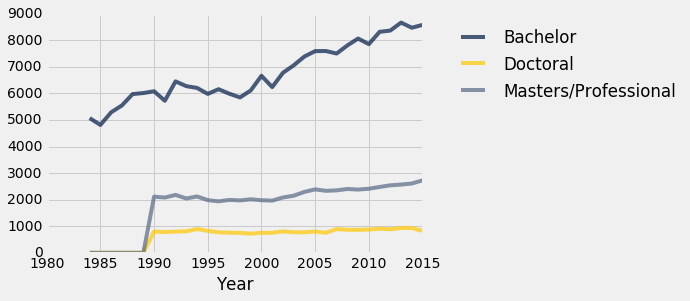

In [37]:
Grads_by_year.plot('Year')

In [38]:
degrees.where('Year', 2015)

Year,DegLvl,DegLvlDesc,College,Div,Dept,Grads,Prorated
2015,1,Bachelor,Clg of Chemistry,Clg of Chemistry,Chem & Biomolecular Eng,121,114.5
2015,1,Bachelor,Clg of Chemistry,Clg of Chemistry,Chemistry,127,127
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Bioengineering,109,101
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Civil & Environmental Eng,68,67.5
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Electrical Eng & Comp Sci,374,365
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Engineering Science,38,36
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Industrial Eng & Ops Rsch,40,39
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Materials Science & Eng,55,39
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Mechanical Engineering,178,172
2015,1,Bachelor,Clg of Engineering,Clg of Engineering,Nuclear Engineering,25,20


In [39]:
graduates = degrees.where('Year', 2015).select(['DegLvlDesc', 'College', 'Dept', 'Grads']).pivot('DegLvlDesc', ['College', 'Dept'], 'Grads', collect=sum)
graduates

College,Dept,Bachelor,Doctoral,Masters/Professional
Clg of Chemistry,Chem & Biomolecular Eng,121,15,32
Clg of Chemistry,Chemistry,127,56,6
Clg of Engineering,App Sci & Tech Grad Grp,0,3,0
Clg of Engineering,Bioengineering,109,16,31
Clg of Engineering,Civil & Environmental Eng,68,45,164
Clg of Engineering,Electrical Eng & Comp Sci,374,65,102
Clg of Engineering,Engineering Science,38,0,0
Clg of Engineering,Industrial Eng & Ops Rsch,40,6,52
Clg of Engineering,Materials Science & Eng,55,10,17
Clg of Engineering,Mechanical Engineering,178,41,137


In [40]:
fte.join('Dept',graduates )

Dept,Div,FTE,Size,College,Bachelor,Doctoral,Masters/Professional
African American Studies,L&S-Social Sciences Div,12.75,Small,Clg of Letters & Science,9,1,4
Ag & Resource Econ & Pol,Clg of Natural Resources,18.85,Medium,Clg of Natural Resources,110,13,7
Anthropology,L&S-Social Sciences Div,27,Medium,Clg of Letters & Science,116,18,6
Architecture,Clg of Env Design,29.75,Medium,Clg of Env Design,135,5,67
Art Practice,L&S-Arts & Humanities Div,6,Small,Clg of Letters & Science,66,0,6
Astronomy,L&S-Math & Phys Sci Div,13,Small,Clg of Letters & Science,20,6,5
Bioengineering,Clg of Engineering,19.5,Medium,Clg of Engineering,109,16,31
Business,Haas School of Business,82,Big,Haas School of Business,356,10,645
Chem & Biomolecular Eng,Clg of Chemistry,16.5,Medium,Clg of Chemistry,121,15,32
Chemistry,Clg of Chemistry,42,Medium,Clg of Chemistry,127,56,6


In [41]:
depts = fte.join('Dept',graduates )
depts['BA per FTE'] = depts['Bachelor'] / depts['FTE']
depts.sort('Dept').show()

Dept,Div,FTE,Size,College,Bachelor,Doctoral,Masters/Professional,BA per FTE
African American Studies,L&S-Social Sciences Div,12.75,Small,Clg of Letters & Science,9,1,4,0.705882
Ag & Resource Econ & Pol,Clg of Natural Resources,18.85,Medium,Clg of Natural Resources,110,13,7,5.83554
Anthropology,L&S-Social Sciences Div,27,Medium,Clg of Letters & Science,116,18,6,4.2963
Architecture,Clg of Env Design,29.75,Medium,Clg of Env Design,135,5,67,4.53782
Art Practice,L&S-Arts & Humanities Div,6,Small,Clg of Letters & Science,66,0,6,11
Astronomy,L&S-Math & Phys Sci Div,13,Small,Clg of Letters & Science,20,6,5,1.53846
Bioengineering,Clg of Engineering,19.5,Medium,Clg of Engineering,109,16,31,5.58974
Business,Haas School of Business,82,Big,Haas School of Business,356,10,645,4.34146
Chem & Biomolecular Eng,Clg of Chemistry,16.5,Medium,Clg of Chemistry,121,15,32,7.33333
Chemistry,Clg of Chemistry,42,Medium,Clg of Chemistry,127,56,6,3.02381


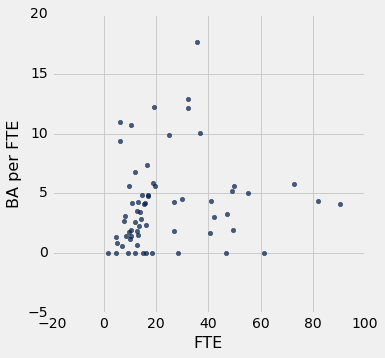

In [42]:
depts.where(depts['BA per FTE'] < 50).scatter('FTE', 'BA per FTE')

In [43]:
#raw_fte.where(raw_fte['FTE'] == 0).show()

In [44]:
depts = raw_fte.join('Dept',graduates )
depts['BA per FTE'] = depts['Bachelor'] / depts['FTE']
depts.sort('Dept').show()

Dept,Div,FTE,College,Bachelor,Doctoral,Masters/Professional,BA per FTE
African American Studies,L&S-Social Sciences Div,12.75,Clg of Letters & Science,9,1,4,0.705882
Ag & Resource Econ & Pol,Clg of Natural Resources,18.85,Clg of Natural Resources,110,13,7,5.83554
Anc Hist Med Arc Grad Grp,L&S-Arts & Humanities Div,0,Clg of Letters & Science,0,2,0,nan
Anthropology,L&S-Social Sciences Div,27,Clg of Letters & Science,116,18,6,4.2963
App Sci & Tech Grad Grp,Clg of Engineering,0,Clg of Engineering,0,3,0,nan
Architecture,Clg of Env Design,29.75,Clg of Env Design,135,5,67,4.53782
Art Practice,L&S-Arts & Humanities Div,6,Clg of Letters & Science,66,0,6,11
Asian Studies Grad Grp,L&S-Social Sciences Div,0,Clg of Letters & Science,0,0,9,nan
Astronomy,L&S-Math & Phys Sci Div,13,Clg of Letters & Science,20,6,5,1.53846
Bioengineering,Clg of Engineering,19.5,Clg of Engineering,109,16,31,5.58974


In [45]:
depts = raw_fte.join('Dept',graduates.drop(['Doctoral', 'Masters/Professional']).where('Bachelor') )
depts['BA per FTE'] = depts['Bachelor'] / depts['FTE']
depts.sort('Dept').show()

Dept,Div,FTE,College,Bachelor,BA per FTE
African American Studies,L&S-Social Sciences Div,12.75,Clg of Letters & Science,9,0.705882
Ag & Resource Econ & Pol,Clg of Natural Resources,18.85,Clg of Natural Resources,110,5.83554
Anthropology,L&S-Social Sciences Div,27,Clg of Letters & Science,116,4.2963
Architecture,Clg of Env Design,29.75,Clg of Env Design,135,4.53782
Art Practice,L&S-Arts & Humanities Div,6,Clg of Letters & Science,66,11
Astronomy,L&S-Math & Phys Sci Div,13,Clg of Letters & Science,20,1.53846
Bioengineering,Clg of Engineering,19.5,Clg of Engineering,109,5.58974
Business,Haas School of Business,82,Haas School of Business,356,4.34146
Chem & Biomolecular Eng,Clg of Chemistry,16.5,Clg of Chemistry,121,7.33333
Chemistry,Clg of Chemistry,42,Clg of Chemistry,127,3.02381


In [46]:
depts.where('FTE', 0)

Dept,Div,FTE,College,Bachelor,BA per FTE
Engineering Science,Clg of Engineering,0,Clg of Engineering,38,inf
IAS Teaching Program,L&S-Undergraduate Div,0,Clg of Letters & Science,407,inf
L&S Chemistry,Clg of Chemistry,0,Clg of Letters & Science,4,inf
L&S Computer Science,Clg of Engineering,0,Clg of Letters & Science,330,inf
L&S Envir Econ & Policy,Clg of Natural Resources,0,Clg of Letters & Science,17,inf
L&S Legal Studies,School of Law,0,Clg of Letters & Science,118,inf
L&S Ops Rsch & Mgmt Sci,Clg of Engineering,0,Clg of Letters & Science,6,inf
L&S Public Health,School of Public Health,0,Clg of Letters & Science,184,inf
L&S Social Welfare,School of Social Welfare,0,Clg of Letters & Science,122,inf
Other Env Design Programs,Clg of Env Design,0,Clg of Env Design,4,inf


In [47]:
xlat = Table(['Dept', 'toDept']).with_rows([
        ('L&S Chemistry', 'Chemistry'),
        ('L&S Computer Science', 'Electrical Eng & Comp Sci'),
        ('L&S Envir Econ & Policy', 'Env Sci, Policy, & Mgmt'),
        ('L&S Legal Studies', 'Law'),
        ('L&S Ops Rsch & Mgmt Sci', 'Industrial Eng & Ops Rsch'),
        ('L&S Public Health', 'Public Health'),
        ('L&S Social Welfare', 'Social Welfare')
    ])
xlat

Dept,toDept
L&S Chemistry,Chemistry
L&S Computer Science,Electrical Eng & Comp Sci
L&S Envir Econ & Policy,"Env Sci, Policy, & Mgmt"
L&S Legal Studies,Law
L&S Ops Rsch & Mgmt Sci,Industrial Eng & Ops Rsch
L&S Public Health,Public Health
L&S Social Welfare,Social Welfare


In [48]:
def fix_dept(dept):
    if dept in xlat['Dept']:
        return xlat['toDept'][list(xlat['Dept']).index(dept)]
    else:
        return dept

In [49]:
fix_dept('History')

'History'

In [50]:
fix_dept('L&S Legal Studies')

'Law'

In [51]:
BAs = graduates.drop(['Doctoral', 'Masters/Professional']).where('Bachelor')
BAs['Dept'] = BAs.apply(fix_dept, 'Dept')
gBAs = BAs.drop('College').group('Dept', collect = sum)
gBAs.show()

Dept,Bachelor sum
African American Studies,9
Ag & Resource Econ & Pol,110
Anthropology,116
Architecture,135
Art Practice,66
Astronomy,20
Bioengineering,109
Business,356
Chem & Biomolecular Eng,121
Chemistry,131


In [52]:
gdepts = raw_fte.join('Dept',gBAs)
gdepts['BA per FTE'] = gdepts['Bachelor sum'] / gdepts['FTE']
gdepts.sort('Dept')

Dept,Div,FTE,Bachelor sum,BA per FTE
African American Studies,L&S-Social Sciences Div,12.75,9,0.705882
Ag & Resource Econ & Pol,Clg of Natural Resources,18.85,110,5.83554
Anthropology,L&S-Social Sciences Div,27,116,4.2963
Architecture,Clg of Env Design,29.75,135,4.53782
Art Practice,L&S-Arts & Humanities Div,6,66,11
Astronomy,L&S-Math & Phys Sci Div,13,20,1.53846
Bioengineering,Clg of Engineering,19.5,109,5.58974
Business,Haas School of Business,82,356,4.34146
Chem & Biomolecular Eng,Clg of Chemistry,16.5,121,7.33333
Chemistry,Clg of Chemistry,42,131,3.11905


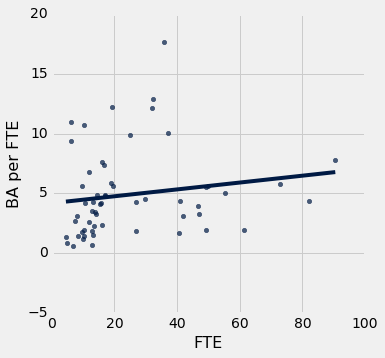

In [53]:
gdepts.where(gdepts['BA per FTE']<20).scatter('FTE', 'BA per FTE',fit_line=True)

In [54]:
gdepts.where(gdepts['BA per FTE']<20).sort('BA per FTE', descending=True)

Dept,Div,FTE,Bachelor sum,BA per FTE
Economics,L&S-Social Sciences Div,35.75,631,17.6503
Integrative Biology,L&S-Bio Sciences Div,32.25,416,12.8992
Statistics,L&S-Math & Phys Sci Div,19.25,235,12.2078
Psychology,L&S-Social Sciences Div,32,389,12.1562
Art Practice,L&S-Arts & Humanities Div,6,66,11
Nutritional Science & Tox,Clg of Natural Resources,10.33,111,10.7454
Political Science,L&S-Social Sciences Div,36.95,370,10.0135
Sociology,L&S-Social Sciences Div,25,247,9.88
Film and Media,L&S-Arts & Humanities Div,6,56,9.33333
Electrical Eng & Comp Sci,Clg of Engineering,90.5,704,7.77901
